## Ejercicio A-6-14

(pág 372 Modern Control Engineering Fifth Edition Katsuhiko Ogata)

![image.png](../img/Ej_A-6-14_fig1.png)

Por definición, para sistemas de segundo orden:
![image.png](../img/Ej_A-6-14_fig2.png)

$P_{deseado}  = -w_n\times cos(\theta) \pm jw_n\times sin(\theta)$

$P_{deseado}  = -w_n\times cos(\theta) \pm jw_n\times \sqrt{1-cos^2(\theta)}$



$\boxed{P_{deseado} = -w_n\times \zeta \pm jw_n\times \sqrt{1-\zeta^2}}$

#### Paquetes necesarios

In [46]:
from control.matlab import *
from cmath import sqrt, phase, pi, tan
import matplotlib.pyplot as plt
from numpy import real, imag
import warnings
warnings.filterwarnings("ignore")

#### Condiciones del problema

In [47]:
wn = 0.5 # frecuencia natural no amortiguada [rad/s]
zeta = 0.7 # factor de amortiguamiento relativo

Pdeseado = -wn*zeta + 1j*wn*sqrt(1-zeta**2)
Pdeseado

(-0.35+0.3570714214271425j)

#### Análisis por Lugar Geométrico de las Raíces

Verificando si con un ajuste de ganancia ya se puede alcanzar el polo deseado

In [48]:
s = tf('s')
G = 1/(10000*(s**2 - 1.1772))
print('G(s) = ')
G

G(s) = 



          1
---------------------
1e+04 s^2 - 1.177e+04

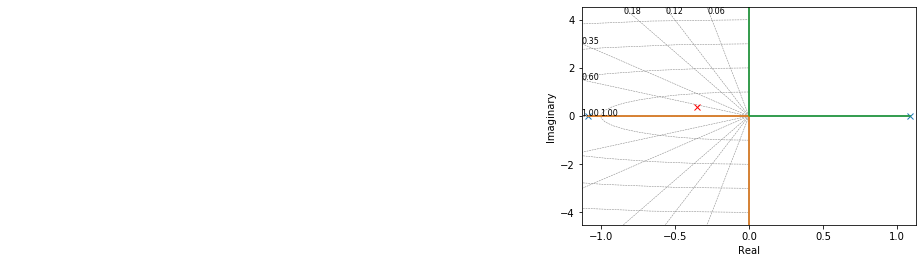

In [70]:
rlocus(G, pd = Pdeseado);
plt.gcf().set_size_inches(20, 10)

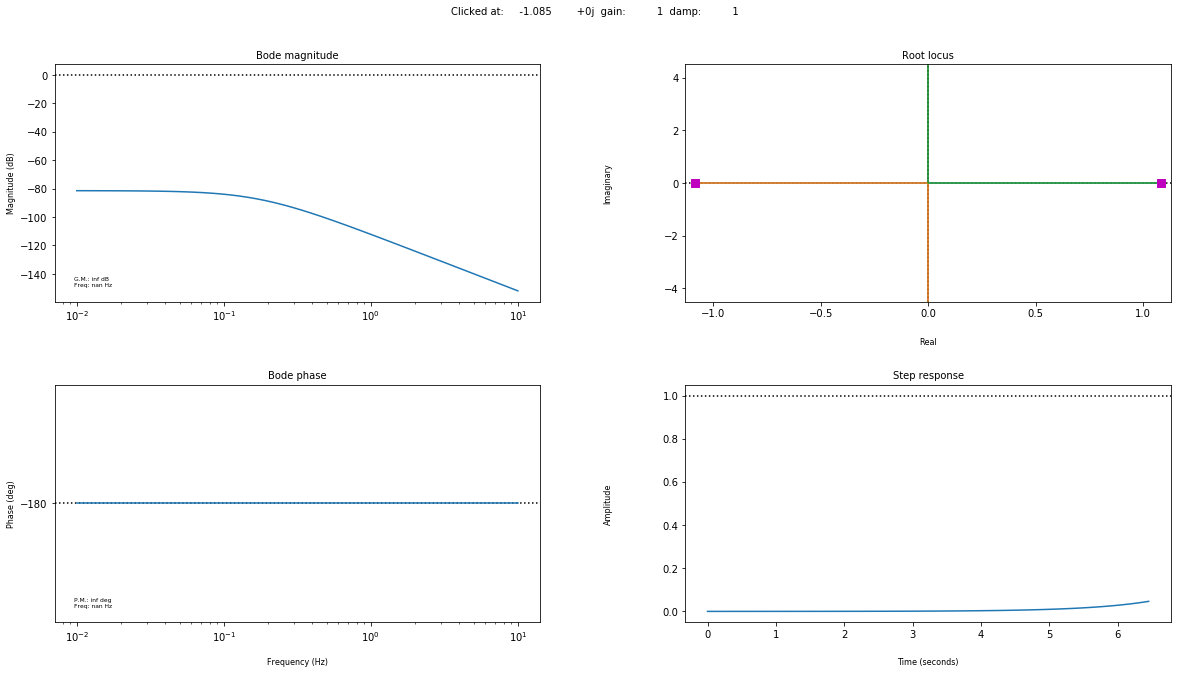

In [71]:
sisotool(G)
plt.gcf().set_size_inches(20, 10)

Se concluye que no se puede llegar al polo deseado mediante un ajuste de ganancia, por lo que el controlador PD es necesario para mover el LGR hacia la izquierda

#### Cálculo de la deficiencia angular

In [51]:
fases = [phase(Pdeseado - Poriginal)*180/pi for Poriginal in pole(G)]
fases

[166.02674489149032, 25.911365606786397]

In [52]:
phi = 180 - sum(fases)
print('Deficiencia angular =', phi)

Deficiencia angular = -11.938110498276728


#### Ubicación del cero del compensador
![image.png](../img/Ej_A-6-14_fig3.png)

## $tan(\phi) = \frac {\omega_{deseado}} {|z|-|\sigma_{deseado}|}  $
## $ z = |\frac {\omega_{deseado}} {tan(\phi)} + |\sigma_{deseado}|| $

In [53]:
z = imag(Pdeseado)/tan(abs(phi)*pi/180)+abs(real(Pdeseado))
z

(2.0388571428571423+0j)

In [54]:
Td = abs(-1/z)
Td

0.4904708520179374

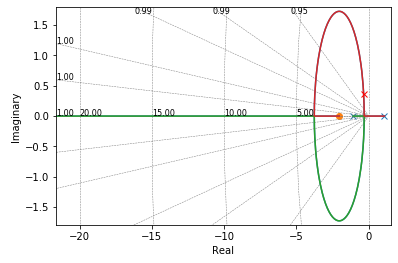

In [55]:
roots, gains = rlocus(G*(1+Td*s), pd = Pdeseado)

#### Alternativa con Plotly

In [ ]:
from plotly import offline as py
roots, gains = rlocus(G*(1+Td*s), pd = Pdeseado)
py.init_notebook_mode()
py.iplot_mpl(plt.gcf())

In [57]:
Gc = (1+Td*s)
GcGs = G*Gc
Kc = -1. / GcGs.horner(Pdeseado)[0][0]
Kc.real

14272.0

### Compensador:

In [58]:
KcGc = Kc*Gc
print("El compensador es:")
KcGc

El compensador es:



7000 s + 1.427e+04
------------------
        1

### Sistema compensado:

In [59]:
KcGcGs = Kc*GcGs
print("El sistema compensado es:")
KcGcGs

El sistema compensado es:



  7000 s + 1.427e+04
---------------------
1e+04 s^2 - 1.177e+04

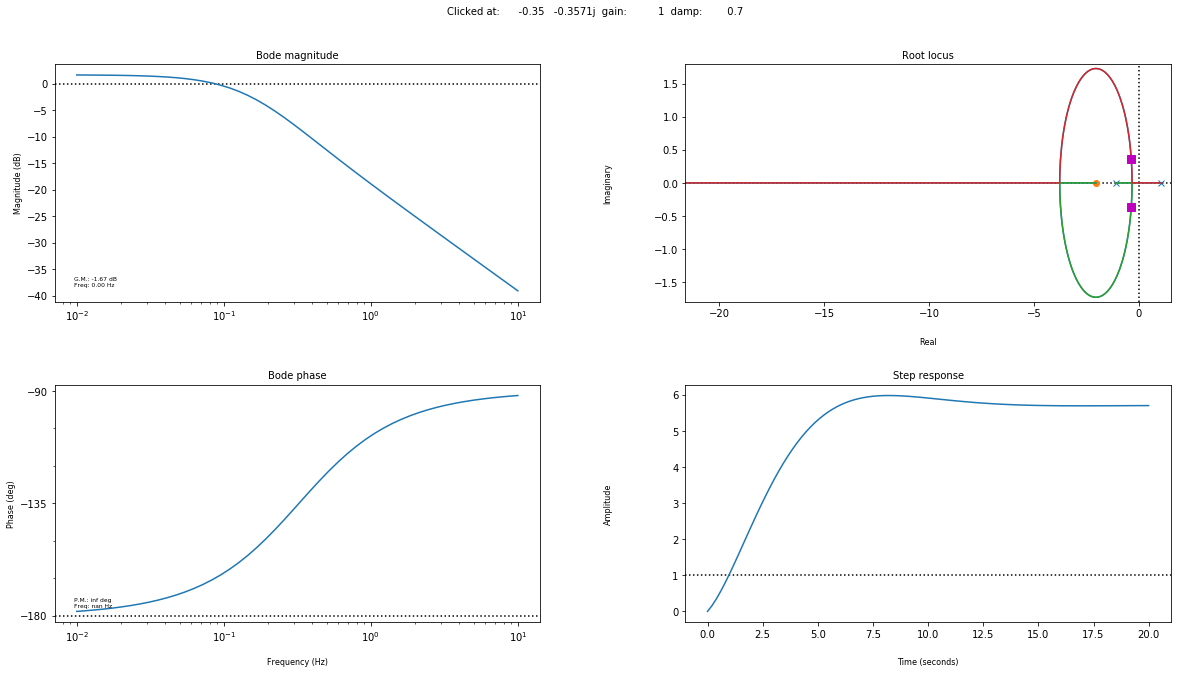

In [62]:
sisotool(KcGcGs)
plt.gcf().set_size_inches(20, 10)

#### Alternativa con plotly

In [ ]:
from plotly import offline as py
sisotool(KcGcGs)
plt.gcf().set_size_inches(12, 8)
py.init_notebook_mode()
py.iplot_mpl(plt.gcf())